<a href="https://colab.research.google.com/github/HinePo/Rio-de-Janeiro-Temperature-Analysis/blob/master/Rio_Temperature_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rio Temperature Data Analysis

Is Rio de Janeiro getting hotter? Use python to check it out!



Dataset can be found in https://www.kaggle.com/volpatto/temperature-timeseries-for-some-brazilian-cities?select=station_rio.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# read csv file using pandas
df = pd.read_csv('/content/station_rio.csv')
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42


## Data cleaning

In [3]:
df = df.rename(columns={'metANN' : 'Temp', 'YEAR' : 'Year'})
df.head(20)

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,Temp
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66,26.28,23.89,21.08,23.67,23.73
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02,25.07,23.74,21.00,23.46,23.32
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01,26.22,25.29,21.74,22.78,24.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73,27.50,24.33,20.78,23.64,24.06
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98,25.93,23.10,22.03,24.02,23.77


In [4]:
# checking null values on the original dataframe
df.isnull().values.any()

False

(array([43.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([ 23.31 , 120.969, 218.628, 316.287, 413.946, 511.605, 609.264,
        706.923, 804.582, 902.241, 999.9  ]),
 <a list of 10 Patch objects>)

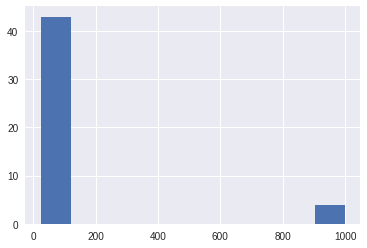

In [5]:
year = df['Year']
temp = df['Temp']

plt.hist(temp, bins = 10)

Plot reaveals that we have invalid and inconsistent values (ex. line 12, year 1885 has values 999.90 for temperatures)

In [6]:
df.columns

Index(['Year', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'Temp'],
      dtype='object')

In [7]:
# replacing inconsistent values (999.90): condition: values equal or greater then 50 ºC
# for all columns, except for 'Year', replace values above 50 ºC by null (np.nan)

for i in df.columns:
  if i != 'Year':
    df.loc[df[i] >= 50, i] = np.nan

In [8]:
# verifying changes (NaN)
df.loc[10:15]

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,Temp
10,1983,26.81,27.63,25.99,24.08,23.82,21.18,21.55,20.91,20.53,23.03,25.25,25.94,26.47,24.63,21.21,22.94,23.81
11,1984,28.56,28.85,26.54,24.46,24.77,22.91,22.20,21.00,21.91,24.44,25.11,25.24,27.78,25.26,22.04,23.82,24.72
12,1985,25.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.65,NaN,NaN,NaN,NaN
13,1986,NaN,27.93,26.95,25.97,NaN,22.70,21.09,22.66,21.46,23.04,25.76,26.17,NaN,25.45,22.15,23.42,24.60
14,1987,27.68,27.25,25.86,25.85,22.73,20.48,22.43,20.80,21.02,22.96,24.59,26.07,27.03,24.81,21.24,22.86,23.99
15,1988,28.82,26.03,26.49,24.65,22.70,19.74,19.24,21.36,21.89,22.19,23.57,25.75,26.97,24.61,20.11,22.55,23.56


In [9]:
# now we have null values on the dataframe
df.isnull().values.any()

True

In [10]:
# How many inconsistent values (greater than 50) did the dataframe have in each column?

empty_entries_per_column = df.isna().sum(axis = 0)
empty_entries_per_column

Year     0
JAN      4
FEB      6
MAR      3
APR      3
MAY      4
JUN      3
JUL      4
AUG      4
SEP      4
OCT      3
NOV      4
DEC      5
D-J-F    4
M-A-M    3
J-J-A    4
S-O-N    3
Temp     4
dtype: int64

In [11]:
# How many inconsistent values (greater than 50) did the dataframe have in each row?

empty_entries_per_row = df.isna().sum(axis = 1)
empty_entries_per_row

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12    15
13     3
14     0
15     0
16     0
17     0
18     0
19     1
20     9
21     3
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30    15
31     3
32     0
33     0
34    13
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     1
43     0
44     0
45     0
46     2
dtype: int64

# Data Visualization and Exploration

## Years and Temperatures

Text(0.5, 1.0, 'Rio de Janeiro Average Temperature (1973 - 2019)')

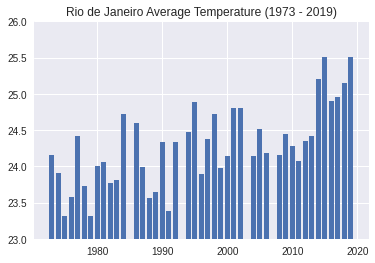

In [12]:
# ploting Year x Average Temperature 

plt.bar(df['Year'], df['Temp'])
plt.ylim(23,26)
plt.title('Rio de Janeiro Average Temperature (1973 - 2019)')

Text(0.5, 1.0, 'Rio de Janeiro Average Temperature (2000 - 2019)')

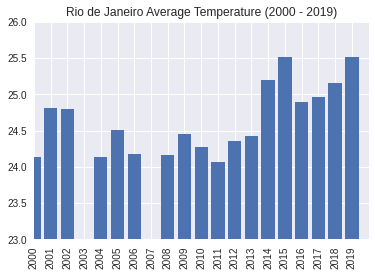

In [13]:
# same plot, with zoom
plt.bar(df['Year'], df['Temp'])
plt.ylim(23,26)
plt.xlim(2000, 2020)
plt.xticks(ticks = np.arange(2000, 2020, step = 1), labels = np.arange(2000, 2020, step = 1), rotation = 90)
plt.title('Rio de Janeiro Average Temperature (2000 - 2019)')

In [14]:
# mean temperature (all years: 1973 - 2019)
avg_temp = round(df.Temp.mean(), 2)
avg_temp

24.29

## Seasons and Temperatures

In [15]:
# seasons mean temperatures
summer = df['D-J-F'].mean()
autumn = df['M-A-M'].mean()
winter = df['J-J-A'].mean()
spring = df['S-O-N'].mean()

round(summer, 2), round(autumn, 2), round(winter, 2), round(spring, 2)

(27.05, 24.84, 21.57, 23.68)

In [16]:
# preparing data to categorical bar plot

data = {'Summer': round(summer, 2), 'Autumn': round(autumn, 2), 'Winter': round(winter, 2), 'Spring': round(spring, 2)}
names = list(data.keys())
values = list(data.values())

In [17]:
len(names)

4

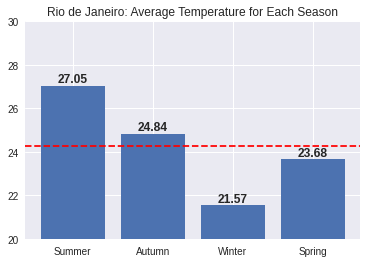

In [18]:
# season mean temperature plot

bar1 = plt.bar(np.arange(len(values)), values)
plt.xticks(range(len(names)), names)
plt.title('Rio de Janeiro: Average Temperature for Each Season')
plt.ylim(20,30)
plt.axhline(avg_temp, color = 'r', linestyle = 'dashed')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom', fontsize = 12, fontweight = 'bold')

## Seasons and Years

### Summer

Text(0.5, 1.0, 'Summer temperatures (1973-2019)')

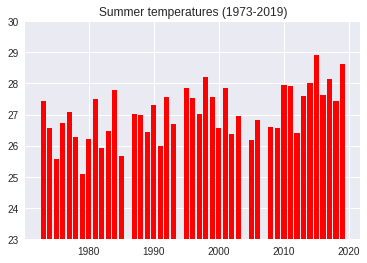

In [19]:
# Summer temperatures
plt.bar(df['Year'], df['D-J-F'], color = 'red')
plt.ylim(23,30)
plt.title('Summer temperatures (1973-2019)')

In [20]:
# Maximum summer temperature
hottest_summer = df['D-J-F'].max()
print("Hottest summer temperature (average):", hottest_summer, "ºC")

# index of maximum summer temperature
idx = df['D-J-F'].idxmax()

# Year of maximum summer temperature
df['Year'][idx]
print("Year of the hottest summer:", df['Year'][idx])

Hottest summer temperature (average): 28.91 ºC
Year of the hottest summer: 2015


In [21]:
# Minimum summer temperature
coldest_summer = df['D-J-F'].min()
print("Coldest summer temperature (average):", coldest_summer, "ºC")

# index of maximum summer temperature
idx = df['D-J-F'].idxmin()

# Year of maximum summer temperature
df['Year'][idx]
print("Year of the coldest summer:", df['Year'][idx])

Coldest summer temperature (average): 25.07 ºC
Year of the coldest summer: 1979


### Winter

Text(0.5, 1.0, 'Winter temperatures (1973-2019)')

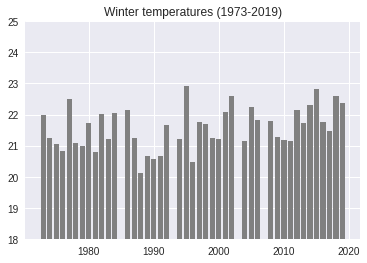

In [22]:
# Winter temperatures
plt.bar(df['Year'], df['J-J-A'], color = 'grey')
plt.ylim(18,25)
plt.title('Winter temperatures (1973-2019)')

In [23]:
# Maximum winter temperature
hottest_winter = df['J-J-A'].max()
print("Hottest winter temperature (average):", hottest_winter, "ºC")

# index of maximum winter temperature
idx = df['J-J-A'].idxmax()

# Year of maximum winter temperature
df['Year'][idx]
print("Year of the hottest winter:", df['Year'][idx])

Hottest winter temperature (average): 22.93 ºC
Year of the hottest winter: 1995


In [24]:
# Minimum winter temperature
coldest_winter = df['J-J-A'].min()
print("Coldest winter temperature (average):", coldest_winter, "ºC")

# index of minimum winter temperature
idx = df['J-J-A'].idxmin()

# Year of minimum winter temperature
df['Year'][idx]
print("Year of the coldest winter:", df['Year'][idx])

Coldest winter temperature (average): 20.11 ºC
Year of the coldest winter: 1988


In [25]:
# preparing data to categorical bar plot

data = {'Summer Max (2015)': round(hottest_summer, 2),
        'Summer Min (1979)': round(coldest_summer, 2), 
        'Winter Max (1995)': round(hottest_winter, 2), 
        'Winter Min (1988)': round(coldest_winter, 2)}

names = list(data.keys())
values = list(data.values())

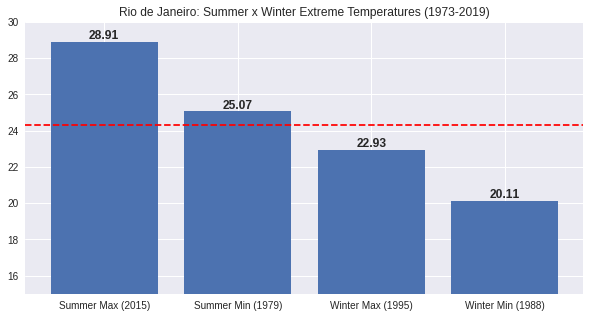

In [26]:
plt.figure(figsize=(10,5))
bar2 = plt.bar(np.arange(len(values)), values)
plt.xticks(range(len(names)), names)
plt.title('Rio de Janeiro: Summer x Winter Extreme Temperatures (1973-2019)')
plt.ylim(15,30)
plt.axhline(avg_temp, color = 'r', linestyle = 'dashed')
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % float(height), ha='center', va='bottom', fontsize = 12, fontweight = 'bold')

# Conclusions

So, what do you think? It does seem Rio is getting hotter....